**MNIST**

手書き数字のデータセット

In [1]:
%matplotlib inline
from __future__ import division, print_function

In [2]:
from keras import backend as K
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


In [3]:
np.random.seed(0)

データを準備

In [4]:
(X_train, labels_train), (X_test, labels_test) = mnist.load_data()

In [5]:
print(X_train.shape, labels_train.shape, sep='\n')

(60000, 28, 28)
(60000,)


データを表示してみる

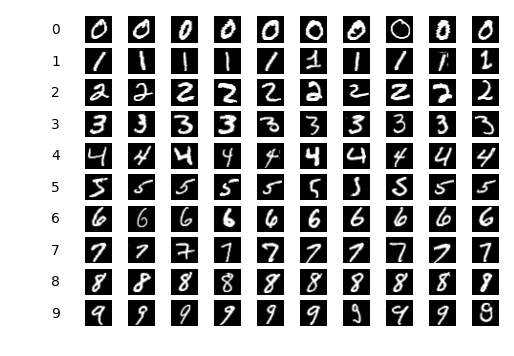

In [6]:
import matplotlib.pyplot as plt

label_images = {label: [] for label in set(labels_train.tolist())}
for x, label in zip(X_train, labels_train):
    if all(len(images) >= 10 for images in label_images.values()):
        break
    if len(label_images[label]) >= 10:
        continue
    label_images[label].append(x)
    
for j, (label, images) in enumerate(label_images.items()):
    plt.subplot(10, 11, j * 11 + 1)
    plt.text(0.5, 0.5, label, ha='center', va='center')
    plt.axis('off')
    for i, image in enumerate(images):
        if i >= 10:
            continue
        plt.subplot(10, 11, j * 11 +  i + 2)
        plt.imshow(image, cmap='Greys_r')
        plt.axis('off')
plt.show()
    
del label_images

各画像は行列なのでベクトルに変換

In [7]:
X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

In [8]:
print(X_train.shape)
print(X_train[:5])

(60000, 784)
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


ラベルをone-hotベクトル（値がひとつだけ1で他が0のベクトル）に変換

In [9]:
Y_train = to_categorical(labels_train)
Y_test = to_categorical(labels_test)

In [10]:
print(Y_train.shape)
print(Y_train[:5])

(60000, 10)
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


モデルを変更して精度が良くなるか試してみよう

In [11]:
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 1s - loss: 7.0984 - acc: 0.5507     
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 4.8975 - acc: 0.6908     
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 4.5246 - acc: 0.7140     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 3.4170 - acc: 0.7828     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 3.2800 - acc: 0.7921     
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 3.2124 - acc: 0.7965     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 3.1455 - acc: 0.8007     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 3.1372 - acc: 0.8021     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 3.1112 - acc: 0.8032     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 3.1047 - acc: 0.8040     


In [13]:
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('accuracy: {}'.format(acc))

accuracy: 0.7991


In [14]:
labels_pred = model.predict_classes(X_test, verbose=0)
print(confusion_matrix(labels_test, labels_pred))
print(classification_report(labels_test, labels_pred))

[[965   0   0   3   1   0   6   3   2   0]
 [  0   0 140 115   1   2   5 111 709  52]
 [  8   0 885  19  18   0  18  28  50   6]
 [  5   0  17 925   0   6   4  16  22  15]
 [  2   0   1   2 911   0  15  10   3  38]
 [ 12   0   3  62  35 677  15  22  54  12]
 [ 10   0   3   0   8   8 907   8  14   0]
 [  1   0  17   3   7   0   0 979   4  17]
 [  5   0   4  26  18  13   7  27 855  19]
 [  7   0   1  16  27   2   1  62   6 887]]
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.00      0.00      0.00      1135
          2       0.83      0.86      0.84      1032
          3       0.79      0.92      0.85      1010
          4       0.89      0.93      0.91       982
          5       0.96      0.76      0.85       892
          6       0.93      0.95      0.94       958
          7       0.77      0.95      0.85      1028
          8       0.50      0.88      0.63       974
          9       0.85      0.88      

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
